In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [ ]:
### YOUR CODE HERE ###
#Pfu
import numpy as np
import pandas as pd

df_initial = pd.read_csv("./drive/My Drive/data/cp_ml/telecom_users.csv")

df_initial.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
#Приводим все категориальные признаки к числам

YES_NO_NIS = {"No internet service": -1, "No": 0, "Yes": 1}

df = df_initial.drop(columns=["customerID"])
df = df.rename(columns={"Unnamed: 0": "id"})
df = df.drop(columns=["id"])

df["gender"] = df["gender"].apply(lambda x: 0 if x == "Male" else 1)
df["Partner"] = df["Partner"].apply(lambda x: 1 if x == "Yes" else 0)
df["Dependents"] = df["Dependents"].apply(lambda x: 1 if x == "Yes" else 0)
df["PhoneService"] = df["PhoneService"].apply(lambda x: 1 if x == "Yes" else 0)
df["MultipleLines"] = df["MultipleLines"].apply(lambda x: ({"No phone service": -1, "No": 0, "Yes": 1})[x])
df["InternetService"] = df["InternetService"].apply(lambda x: ({"No": 0, "DSL": 1, "Fiber optic": 2})[x])
df["OnlineSecurity"] = df["OnlineSecurity"].apply(lambda x: YES_NO_NIS[x])
df["OnlineBackup"] = df["OnlineBackup"].apply(lambda x: YES_NO_NIS[x])
df["DeviceProtection"] = df["DeviceProtection"].apply(lambda x: YES_NO_NIS[x])
df["TechSupport"] = df["TechSupport"].apply(lambda x: YES_NO_NIS[x])
df["StreamingTV"] = df["StreamingTV"].apply(lambda x: YES_NO_NIS[x])
df["StreamingMovies"] = df["StreamingMovies"].apply(lambda x: YES_NO_NIS[x])
df["Contract"] = df["Contract"].apply(lambda x: ({"Month-to-month": 1, "One year": 2, "Two year": 3})[x])
df["PaperlessBilling"] = df["PaperlessBilling"].apply(lambda x: 1 if x == "Yes" else 0)
df["PaymentMethod"] = df["PaymentMethod"].apply(lambda x: ({"Electronic check": 1, "Mailed check": 2, "Bank transfer (automatic)": 3, "Credit card (automatic)": 4})[x])
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)
def total_charges(x):
    s = np.nan
    try:
        s = float(x)
    except: pass
    return s

df["TotalCharges"] = df["TotalCharges"].apply(lambda x: total_charges(x))
df = df.dropna()

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,72,1,1,0,-1,-1,-1,-1,-1,-1,3,0,4,24.10,1734.65,0
1,1,0,0,0,44,1,0,2,0,1,1,0,1,0,1,1,4,88.15,3973.20,0
2,1,1,1,0,38,1,1,2,0,0,0,0,0,0,1,1,3,74.95,2869.85,1
3,0,0,0,0,4,1,0,1,0,0,0,0,0,1,1,1,1,55.90,238.50,0
4,0,0,0,0,2,1,0,1,1,0,1,0,0,0,1,0,1,53.45,119.50,0


In [ ]:
len(df)

5976

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b658da320>,
      dtype=object)

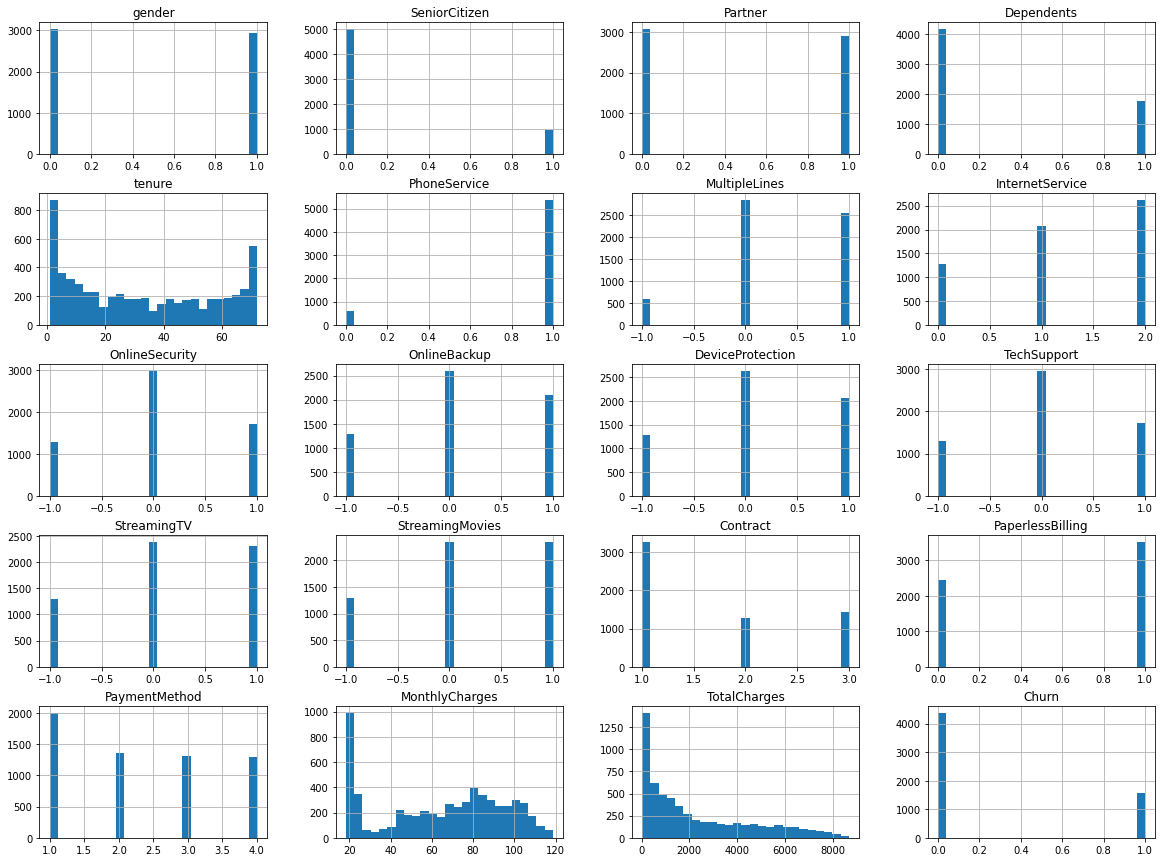

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 15)

df.hist(bins=25)

In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.00000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,0.490629,0.161647,0.484605,0.298025,32.523092,0.901606,0.327477,1.224565,0.07095,0.134203,0.128347,0.074799,0.170348,0.176205,1.692604,0.589859,2.318608,64.846687,2298.060617,0.265562
std,0.499954,0.368157,0.499805,0.457429,24.500858,0.297871,0.645827,0.777361,0.70431,0.739147,0.736219,0.706641,0.755962,0.758490,0.832028,0.491900,1.150832,30.107576,2274.127165,0.441669
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,35.750000,404.312500,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,70.425000,1412.150000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,89.900000,3846.962500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.000000,118.750000,8684.800000,1.000000


In [ ]:
len(df[df["Churn"] == 0])/len(df)

0.7344377510040161

In [ ]:
len(df[df["PhoneService"] == 0])/len(df)

0.09839357429718876

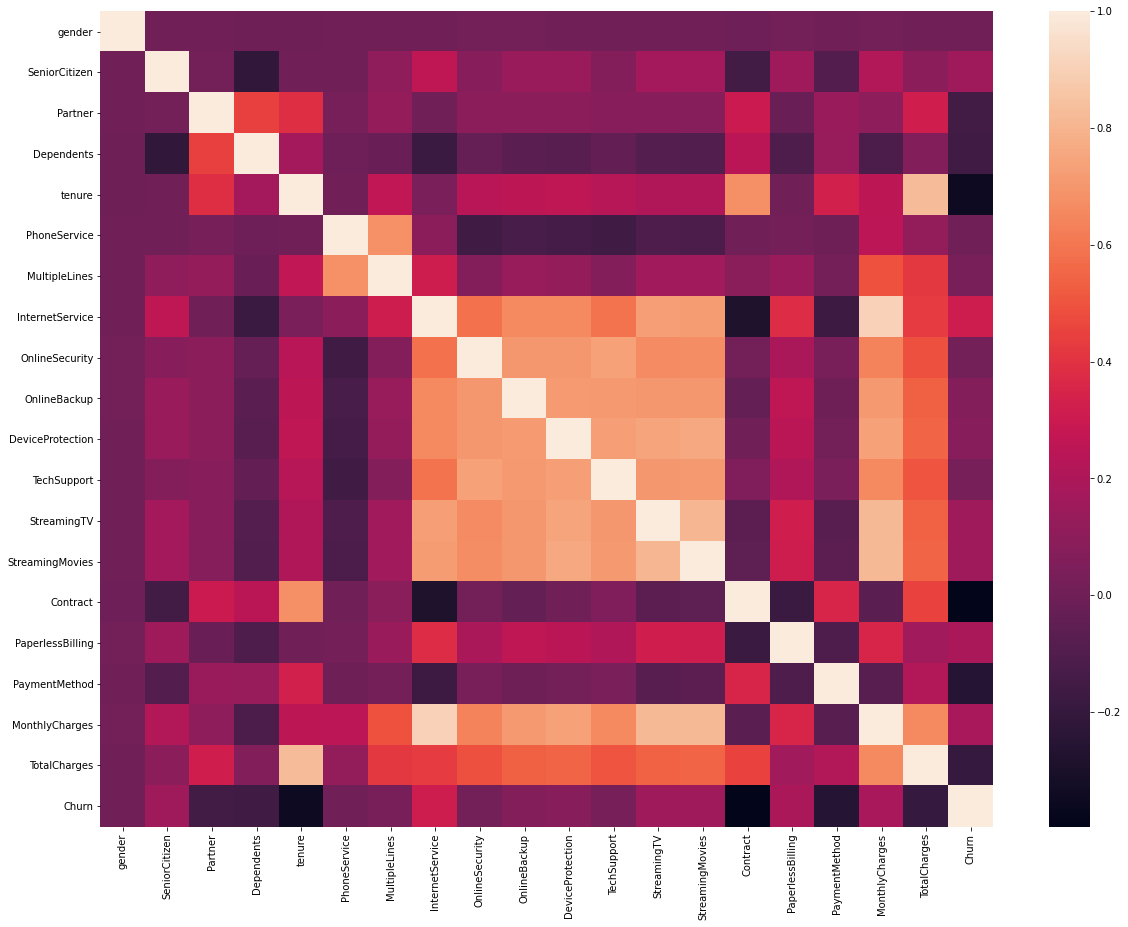

In [ ]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

### Описание данных

Изначальная выборка в 5986 объектов содержит нечисловые значения в столбце TotalCharges, после удаления которых остается 5976 объектов, характеризующимися 20 признаками, из которых 6 бинарные, 3 вещественные, 11 категориальные. Интересующий нас целевой признак Churn является бинарным, таким образом для построения модели у нас есть 5 бинарных, 11 категориальных и 3 вещественных признака.

#### Бинарные признаки:
gender и Partner распределены по выборке близко к равномерному распределению, чего нельзя сказать о других признаках. Признак PhoneService распределен как 9:1. Имеет значение, что целевой признак Churn распределен как 3:1, для нас наиболее важными являются те объекты, где отток произошел, но их всего лишь 25% выборки, что выявляет ее некоторый перекос.

#### Категориальные признаки:
На тепловой карте выше видно, что блок признаков InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies высоко коррелируют между собой, что возможно связано с их общим значением (No Internet Service (-1)), а также тем, что они, например, идут в тарифе общим пакетом, а не отдельными опциями. Высоко коррелируют также с ними всеми признаки MonthlyCharges и TotalCharges, который уже на основе тепловой карты можно предположить как линейную комбинацию этих и других признаков. Высоко коррелируют между собой значения PhoneService и MultipleLines.

#### Вещественные признаки:
Признак tenure имеет гистограмму которую можно охарактеризовать как "обратное нормальное распределения" - пики имеют крайние значения, соответствующие новым и очень старым лояльным пользователям, а середину образует "яма". Матожидание 32 месяца при стандартном отклонении 24 месяца.

Признак MonthlyCharges распределен бимодально, с первой высокой модой в 20 долларов и второй в 80 долларов.

Признак TotalCharges имеет убывающее распределение с длинным хвостом, мода равна минимальным значениям около 20 долларов, что определяется большим количеством пользователей, пользовавшихся сервисами компании всего 1 месяц.

Вполне очевидно, что TotalCharges является очень большим приближением к линейной комбинации признаков MonthlyCharges и TotalCharges, поэтому это первый кандидат на удаление из выборки.

После получения такой предварительной картины, преобразуем категориальные признаки со значением No Service к бинарным (приравнивая No service и No) и строим тепловую карту заново.




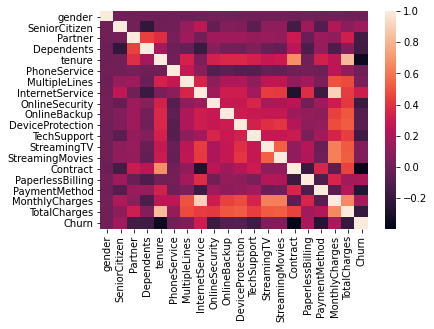

In [ ]:
YES_NO_NIS = {"No internet service": 0, "No": 0, "Yes": 1}

df = df_initial.drop(columns=["customerID"])
df = df.rename(columns={"Unnamed: 0": "id"})
df = df.drop(columns=["id"])

df["gender"] = df["gender"].apply(lambda x: 0 if x == "Male" else 1)
df["Partner"] = df["Partner"].apply(lambda x: 1 if x == "Yes" else 0)
df["Dependents"] = df["Dependents"].apply(lambda x: 1 if x == "Yes" else 0)
df["PhoneService"] = df["PhoneService"].apply(lambda x: 1 if x == "Yes" else 0)
df["MultipleLines"] = df["MultipleLines"].apply(lambda x: ({"No phone service": 0, "No": 0, "Yes": 1})[x])
df["InternetService"] = df["InternetService"].apply(lambda x: ({"No": 0, "DSL": 1, "Fiber optic": 2})[x])
df["OnlineSecurity"] = df["OnlineSecurity"].apply(lambda x: YES_NO_NIS[x])
df["OnlineBackup"] = df["OnlineBackup"].apply(lambda x: YES_NO_NIS[x])
df["DeviceProtection"] = df["DeviceProtection"].apply(lambda x: YES_NO_NIS[x])
df["TechSupport"] = df["TechSupport"].apply(lambda x: YES_NO_NIS[x])
df["StreamingTV"] = df["StreamingTV"].apply(lambda x: YES_NO_NIS[x])
df["StreamingMovies"] = df["StreamingMovies"].apply(lambda x: YES_NO_NIS[x])
df["Contract"] = df["Contract"].apply(lambda x: ({"Month-to-month": 1, "One year": 2, "Two year": 3})[x])
df["PaperlessBilling"] = df["PaperlessBilling"].apply(lambda x: 1 if x == "Yes" else 0)
df["PaymentMethod"] = df["PaymentMethod"].apply(lambda x: ({"Electronic check": 1, "Mailed check": 2, "Bank transfer (automatic)": 3, "Credit card (automatic)": 4})[x])
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)
def total_charges(x):
    s = np.nan
    try:
        s = float(x)
    except: pass
    return s

df["TotalCharges"] = df["TotalCharges"].apply(lambda x: total_charges(x))
df = df.dropna()

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Стало значительно лучше, теперь у нас 12 бинарных, 3 вещественных и 4 категориальных признака

# 2. Исследование зависимостей и формулирование гипотез

Построим диаграммы рассеяния по вещественным признакам.

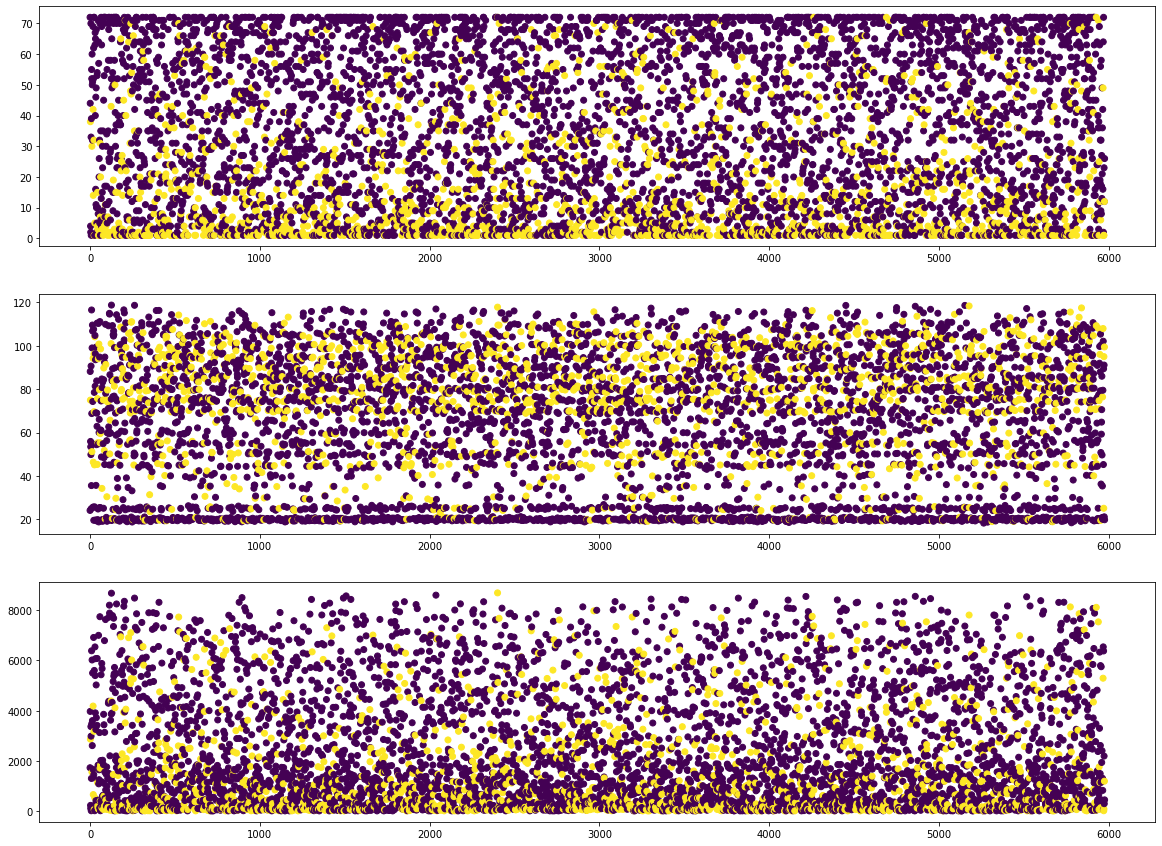

In [ ]:
### YOUR CODE HERE ###
#1. Рассмотрим зависимости по вещественным признакам

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3, 1, figsize=(20,15))
ax[0].scatter(range(len(df)), df["tenure"], c=df["Churn"])
ax[1].scatter(range(len(df)), df["MonthlyCharges"], c=df["Churn"])
ax[2].scatter(range(len(df)), df["TotalCharges"], c=df["Churn"])
plt.show()

Линейная разделимость не просматривается ни на одной из диаграмм, однако субъективно можно заметить, что чаще уходят пользователи с низким значением tenure и высоким значением MonthlyCharges. Дополнительно построим scatter matrix из Pandas.

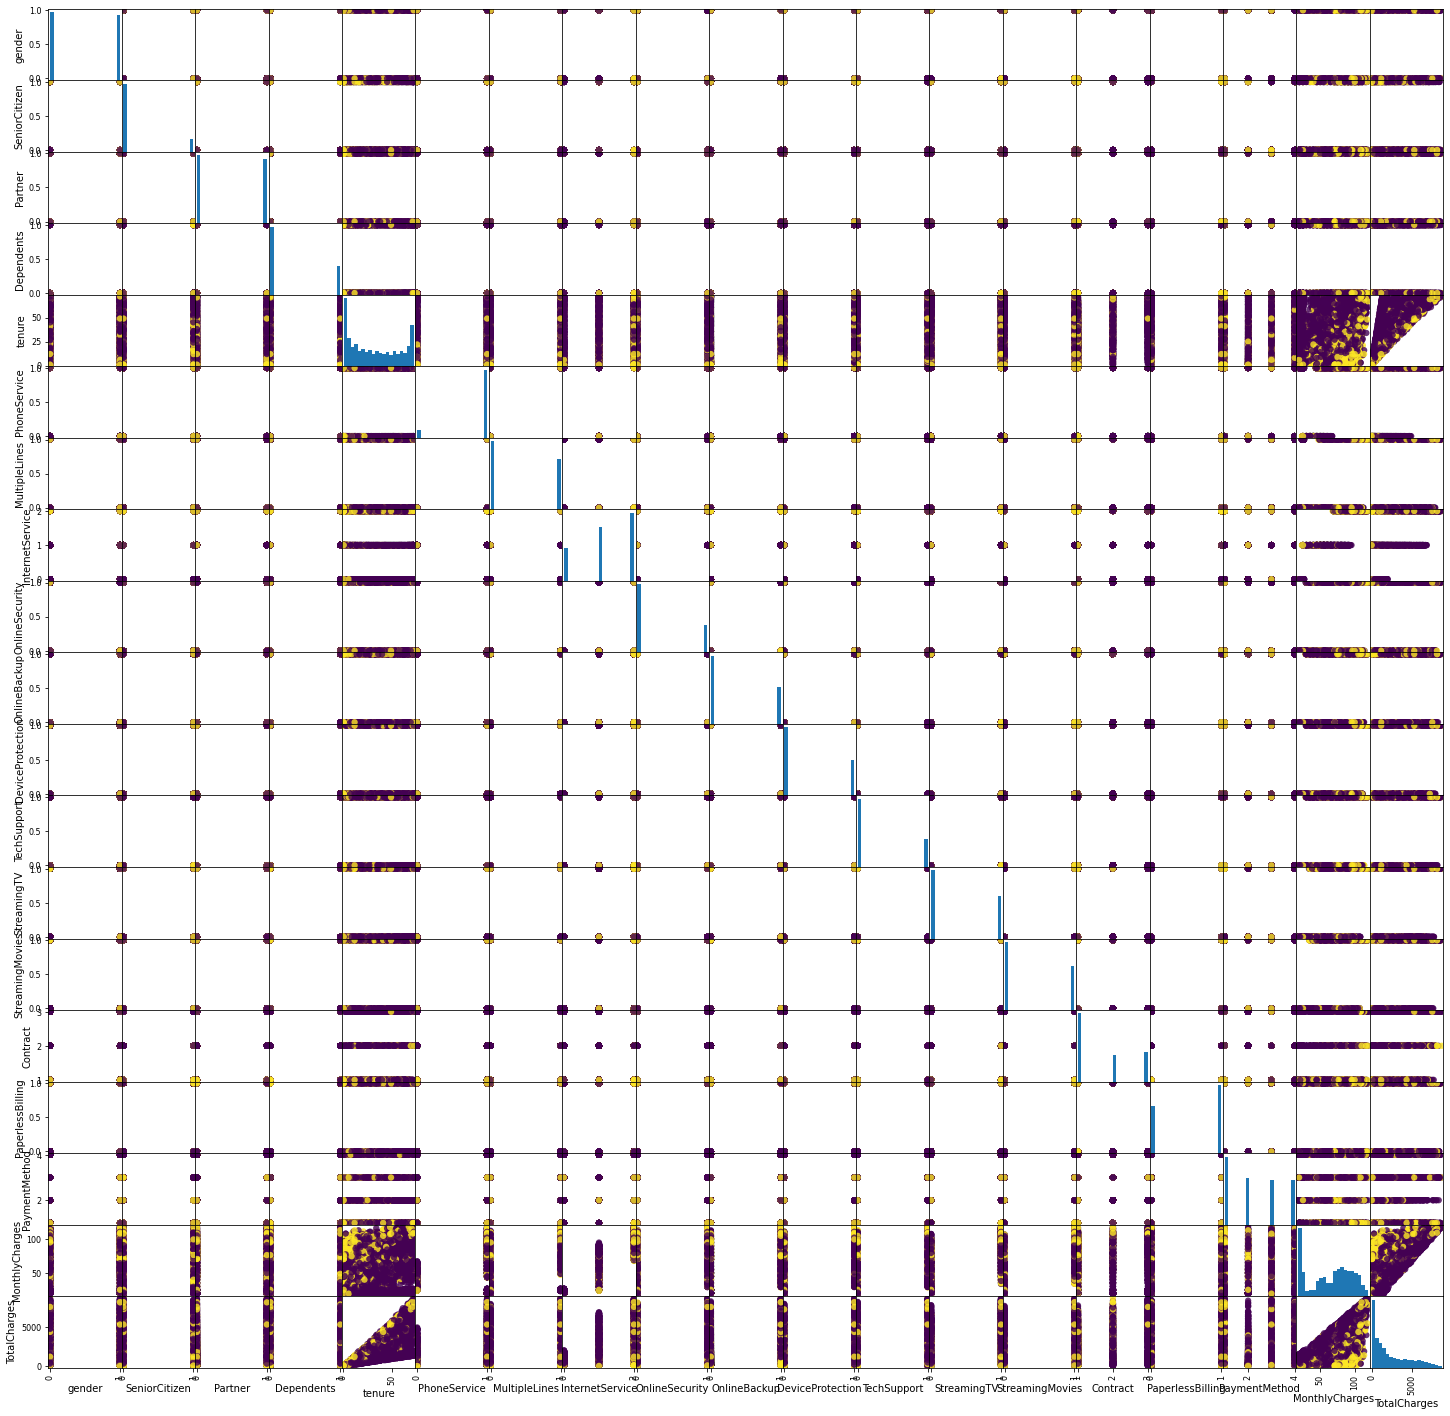

In [ ]:
features = df.drop(columns="Churn")

targets = df["Churn"]

scat_mtrx = pd.plotting.scatter_matrix(features, c=targets, figsize=(25, 25), marker='o', hist_kwds={'bins': 20}, s=40, alpha=.8)

При доминировании бинарных признаков это мало, что дает.

# 3. Построение моделей для прогнозирования оттока

Сравним как будут вести себя DecisionTreeClassifier, LogisticRegression, GaussianNB и XGBoost


In [ ]:
### YOUR CODE HERE ###

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost

Xt, Xv, Yt, Yv = train_test_split(features, targets, test_size=0.25, random_state=42)

dtc = DecisionTreeClassifier()
dtc.fit(Xt, Yt)

lr = LogisticRegression()
lr.fit(Xt, Yt)

nb = GaussianNB()
nb.fit(Xt, Yt)

dtrain = xgboost.DMatrix(Xt, Yt)
dtest = xgboost.DMatrix(Xv, Yv)

xgb_params = {'objective': 'binary:logistic',
              'max_depth': 3,
              'eta': 0.1}

num_rounds = 50
xgb = xgboost.train(xgb_params, dtrain, num_boost_round=num_rounds)


# 4. Сравнение качества моделей 

In [ ]:
### YOUR CODE HERE ###
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, roc_auc_score

results = pd.DataFrame(columns=["classifier", "precision", "accuracy", "recall", "ROC-AUC"])

#DCT
Ypred = dtc.predict(Xv)
results = results.append({
    "classifier": "DecisionTreeClassifier",
    "precision":  precision_score(Yv, Ypred),
    "accuracy":   accuracy_score(Yv, Ypred),
    "recall":     recall_score(Yv, Ypred),
    "ROC-AUC":    roc_auc_score(Yv, Ypred)
}, ignore_index=True)

#lr
Ypred = lr.predict(Xv)
results = results.append({
    "classifier": "LogisticRegression",
    "precision":  precision_score(Yv, Ypred),
    "accuracy":   accuracy_score(Yv, Ypred),
    "recall":     recall_score(Yv, Ypred),
    "ROC-AUC":    roc_auc_score(Yv, Ypred)
}, ignore_index=True)

#NB
Ypred = nb.predict(Xv)
results = results.append({
    "classifier": "GaussianNB",
    "precision":  precision_score(Yv, Ypred),
    "accuracy":   accuracy_score(Yv, Ypred),
    "recall":     recall_score(Yv, Ypred),
    "ROC-AUC":    roc_auc_score(Yv, Ypred)
}, ignore_index=True)

#XGBoost
Ypred = xgb.predict(xgboost.DMatrix(Xv))
Ypred = np.array(list(map(lambda x: 1 if x > 0.5 else 0, Ypred)))
results = results.append({
    "classifier": "XGBoost",
    "precision":  precision_score(Yv, Ypred),
    "accuracy":   accuracy_score(Yv, Ypred),
    "recall":     recall_score(Yv, Ypred),
    "ROC-AUC":    roc_auc_score(Yv, Ypred)
}, ignore_index=True)

results.head()

,classifier,precision,accuracy,recall,ROC-AUC
0,DecisionTreeClassifier,0.479263,0.722892,0.525253,0.659712
1,LogisticRegression,0.662500,0.804552,0.535354,0.718496
2,GaussianNB,0.519643,0.749665,0.734848,0.744929
3,XGBoost,0.662116,0.798527,0.489899,0.699868


Логистическая регрессия показывает лучший результат по Accuracy, в то же время классификатор GaussianNB лучший по показателю Recall и впереди по ROC-AUC.

Попробуем улучшить модель логистической регрессии. Удалим из выборки TotalCharges, а tenure и MonthlyCharges нормализуем MinMaxScaler, после чего используем класс LogisticRegressionCV

In [ ]:
features1 = features.drop(columns=["TotalCharges"]).copy()
from sklearn.preprocessing import MinMaxScaler

features1["tenure"] = MinMaxScaler().fit_transform(features1[["tenure"]])
features1["MonthlyCharges"] = MinMaxScaler().fit_transform(features1[["MonthlyCharges"]])

Xt, Xv, Yt, Yv = train_test_split(features1, targets, test_size=0.25, random_state=42)

lr1 = LogisticRegressionCV(cv=5, max_iter=1000)
lr1.fit(Xt, Yt)

Ypred = lr1.predict(Xv)
results = results.append({
    "classifier": "LogisticRegressionCV",
    "precision":  precision_score(Yv, Ypred),
    "accuracy":   accuracy_score(Yv, Ypred),
    "recall":     recall_score(Yv, Ypred),
    "ROC-AUC":    roc_auc_score(Yv, Ypred)
}, ignore_index=True)

results

,classifier,precision,accuracy,recall,ROC-AUC
0,DecisionTreeClassifier,0.479263,0.722892,0.525253,0.659712
1,LogisticRegression,0.662500,0.804552,0.535354,0.718496
2,GaussianNB,0.519643,0.749665,0.734848,0.744929
3,XGBoost,0.662116,0.798527,0.489899,0.699868
4,LogisticRegressionCV,0.660550,0.805221,0.545455,0.722181


Показатели незначительно улучшились.